# Gas Turbines Data Analysis

By Kaiqi Zhao, Kaitlyn Reist, and Kyeongseo Choi

Today We will be analyzing a synthetic dataset for the operation of gas turbine engines from different customer sites around the world. We seek to analyze and find insights into how energy can be generated in a way that leads to the least environmental harm.

# 1. Loading our Data and importing packages

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
site = pd.read_csv('site_metadata.csv')
engine = pd.read_csv('engine_metadata.csv')
data_from_engine = []
for filename in engine['FILE_ID']:
    data_from_engine.append(pd.read_csv('all_data_v2/' + filename))
data_from_engine[0].head()

,Unnamed: 0,CMP_SPEED,POWER,FUEL_FLOW,CO2
0,2021-01-01 00:00:00,9086.266279,13905.170114,1.775834,4.655888
1,2021-01-01 01:00:00,9092.889629,13948.422258,1.777604,4.660529
2,2021-01-01 02:00:00,9083.496415,13915.430132,1.775123,4.654023
3,2021-01-01 03:00:00,9091.149440,13924.413251,1.776514,4.657670
4,2021-01-01 04:00:00,9098.178455,13951.961041,1.776658,4.658047


`all_data_v2` is a folder that contains multiple csv files that are named in the `engine` dataframe. To load that data in a way that is usable, we created a list of lists `data_from_engine` so that we can access each individual csv file from indexing.

In [3]:
site.head()

,CUSTOMER_NAME,PLANT_NAME,LATITUDE,LONGITUDE,ELEVATION,FUEL_N2_MOL_PCT,FUEL_MW,FUEL_LHV,CO2_FUEL_RATIO
0,SPIFFY,SPIRITUAL-POLECAT,61.170356,42.874767,112.000000,4.445063,16.572225,21514.22237,2.621803
1,NONCHALANT,NIFTY-ROOK,37.554516,49.908217,-29.000000,1.053145,16.166097,21526.47083,2.714870
2,NONCHALANT,PREHISTORIC-PETREL,29.190866,60.491702,1552.426025,10.298848,17.273122,21494.43867,2.461189
3,NONCHALANT,THERAPEUTIC-LIONFISH,13.253365,76.411056,867.591553,13.188814,17.619149,21485.25198,2.381895
4,SOFT,ABORIGINAL-PICULET,-68.632002,66.155301,1253.152832,7.581916,16.947813,21503.41744,2.535736


`FUEL_MW` resulting molecular weight of the gas fuel. `FUEL_N2_MOL_PCT` is the percentage of N2 in the fuel mixture.

In [4]:
engine.head()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID
0,SPIFFY,SPIRITUAL-POLECAT,ENGINE_1,data_1.csv
1,SPIFFY,SPIRITUAL-POLECAT,ENGINE_2,data_2.csv
2,SPIFFY,SPIRITUAL-POLECAT,ENGINE_3,data_3.csv
3,NONCHALANT,NIFTY-ROOK,ENGINE_1,data_4.csv
4,NONCHALANT,NIFTY-ROOK,ENGINE_2,data_5.csv


# 2. Understanding the data

So far we have loaded in three datasets `site`, `engine`, and a list of lists `data_from_engine`. Now lets look into the data types and basic statistics for each columns 

In [5]:
site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_NAME    45 non-null     object 
 1   PLANT_NAME       45 non-null     object 
 2   LATITUDE         45 non-null     float64
 3   LONGITUDE        45 non-null     float64
 4   ELEVATION        45 non-null     float64
 5   FUEL_N2_MOL_PCT  45 non-null     float64
 6   FUEL_MW          45 non-null     float64
 7   FUEL_LHV         45 non-null     float64
 8   CO2_FUEL_RATIO   45 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.3+ KB


In [6]:
site.describe()

,LATITUDE,LONGITUDE,ELEVATION,FUEL_N2_MOL_PCT,FUEL_MW,FUEL_LHV,CO2_FUEL_RATIO
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,17.243653,37.174801,623.445715,6.619633,16.832595,21507.259317,2.562138
std,38.429268,80.848357,774.576591,4.952430,0.592974,16.803805,0.135883
min,-68.632002,-124.258997,-29.000000,0.013945,16.041670,21479.831420,2.333600
25%,-12.144846,13.186017,112.000000,1.517543,16.221701,21494.438670,2.461189
50%,24.641433,43.578863,293.472839,6.603028,16.830607,21506.737470,2.562594
75%,52.399654,105.652455,881.143372,10.298848,17.273122,21524.757620,2.702128
max,61.912226,178.144855,4067.592529,14.948987,17.829902,21530.347570,2.743383


In [7]:
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CUSTOMER_NAME  213 non-null    object
 1   PLANT_NAME     213 non-null    object
 2   ENGINE_ID      213 non-null    object
 3   FILE_ID        213 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [8]:
engine.describe()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID
count,213,213,213,213
unique,15,45,8,213
top,BUSY,BEAUTIFUL-HIPPO,ENGINE_1,data_1.csv
freq,33,8,45,1


In [9]:
data_from_engine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8761 non-null   object 
 1   CMP_SPEED   8761 non-null   float64
 2   POWER       7311 non-null   float64
 3   FUEL_FLOW   7311 non-null   float64
 4   CO2         7311 non-null   float64
dtypes: float64(4), object(1)
memory usage: 342.4+ KB


In [10]:
data_from_engine[0].describe()

,CMP_SPEED,POWER,FUEL_FLOW,CO2
count,8761.000000,7311.000000,7311.000000,7311.000000
mean,7600.986111,14124.309406,1.794676,4.705287
std,3538.460512,2810.864004,0.203256,0.532898
min,0.000000,3412.214309,0.905065,2.372902
25%,7882.511739,13452.131312,1.761675,4.618766
50%,9341.121494,15358.571449,1.883137,4.937216
75%,9805.304890,16044.227377,1.925456,5.048167
max,10000.000000,16579.667303,1.967059,5.157241


# 3. Organizing and cleaning our data

To better analyze our data, lets combine our different datasets into one dataset.

First we need to clean our data by checking for rows with null values and then removing them.

In [11]:
for i in range(len(data_from_engine)):
    data_from_engine[i] = data_from_engine[i].dropna(axis=0)

To better analyze our data we will take the mean of each column located within each csv file of the `FILE_ID` column and add that mean as a new column to our `engine` dataframe. Many values contained within each csv file seem to be relatively close to each other so extracting the mean for each of them should prove to be adequate for our analysis

In [12]:
#Creating column of mean values for CMP Speed
CMP_Speed_Mean_list = []
for i in range(len(data_from_engine)):
    cmp_speed_mean = data_from_engine[i]['CMP_SPEED'].mean()
    CMP_Speed_Mean_list.append(cmp_speed_mean)
engine['CMP_SPEED_MEAN'] = CMP_Speed_Mean_list

#Creating column of mean values for power
Power_Mean_list = []
for i in range(len(data_from_engine)):
    power_mean = data_from_engine[i]['POWER'].mean()
    Power_Mean_list.append(power_mean)
engine['POWER_MEAN'] = Power_Mean_list

#Creating column of mean values for fuel flow
Fuelflow_Mean_list = []
for i in range(len(data_from_engine)):
    fuelflow_mean = data_from_engine[i]['FUEL_FLOW'].mean()
    Fuelflow_Mean_list.append(fuelflow_mean)
engine['FUEL_FLOW_MEAN'] = Fuelflow_Mean_list

#Creating column of mean values for CO2
CO2_Mean_list = []
for i in range(len(data_from_engine)):
    co2_mean = data_from_engine[i]['CO2'].mean()
    CO2_Mean_list.append(co2_mean)
engine['CO2_MEAN'] = CO2_Mean_list

In [13]:
engine.head()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID,CMP_SPEED_MEAN,POWER_MEAN,FUEL_FLOW_MEAN,CO2_MEAN
0,SPIFFY,SPIRITUAL-POLECAT,ENGINE_1,data_1.csv,9108.499428,14124.309406,1.794676,4.705287
1,SPIFFY,SPIRITUAL-POLECAT,ENGINE_2,data_2.csv,8178.963655,11786.238341,1.681671,4.409011
2,SPIFFY,SPIRITUAL-POLECAT,ENGINE_3,data_3.csv,9245.643595,14698.835920,1.867654,4.896623
3,NONCHALANT,NIFTY-ROOK,ENGINE_1,data_4.csv,9553.472418,14859.255745,1.938304,5.262242
4,NONCHALANT,NIFTY-ROOK,ENGINE_2,data_5.csv,8161.007195,11324.559414,1.652687,4.486829


Next we will merge our `engine` dataframe with our `site` dataframe to create one final dataframe

In [14]:
engine_final = engine.merge(site, on=['CUSTOMER_NAME', 'PLANT_NAME'])
engine_final.head()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID,CMP_SPEED_MEAN,POWER_MEAN,FUEL_FLOW_MEAN,CO2_MEAN,LATITUDE,LONGITUDE,ELEVATION,FUEL_N2_MOL_PCT,FUEL_MW,FUEL_LHV,CO2_FUEL_RATIO
0,SPIFFY,SPIRITUAL-POLECAT,ENGINE_1,data_1.csv,9108.499428,14124.309406,1.794676,4.705287,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803
1,SPIFFY,SPIRITUAL-POLECAT,ENGINE_2,data_2.csv,8178.963655,11786.238341,1.681671,4.409011,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803
2,SPIFFY,SPIRITUAL-POLECAT,ENGINE_3,data_3.csv,9245.643595,14698.835920,1.867654,4.896623,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803
3,NONCHALANT,NIFTY-ROOK,ENGINE_1,data_4.csv,9553.472418,14859.255745,1.938304,5.262242,37.554516,49.908217,-29.0,1.053145,16.166097,21526.47083,2.714870
4,NONCHALANT,NIFTY-ROOK,ENGINE_2,data_5.csv,8161.007195,11324.559414,1.652687,4.486829,37.554516,49.908217,-29.0,1.053145,16.166097,21526.47083,2.714870


Finally, one metric that will be essential in our analysis is the thermal efficiency of gas turbine engines. We can find this through the equation shown below. Then we can add a `THRM_EFF` column to our final dataset. 

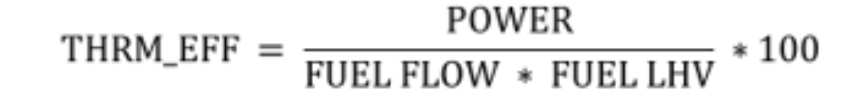

In [15]:
engine_final['THRM_EFF'] = (Power_Mean_list/(Fuelflow_Mean_list * engine_final['FUEL_LHV']))*100
engine_final.head()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID,CMP_SPEED_MEAN,POWER_MEAN,FUEL_FLOW_MEAN,CO2_MEAN,LATITUDE,LONGITUDE,ELEVATION,FUEL_N2_MOL_PCT,FUEL_MW,FUEL_LHV,CO2_FUEL_RATIO,THRM_EFF
0,SPIFFY,SPIRITUAL-POLECAT,ENGINE_1,data_1.csv,9108.499428,14124.309406,1.794676,4.705287,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803,36.581005
1,SPIFFY,SPIRITUAL-POLECAT,ENGINE_2,data_2.csv,8178.963655,11786.238341,1.681671,4.409011,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803,32.576805
2,SPIFFY,SPIRITUAL-POLECAT,ENGINE_3,data_3.csv,9245.643595,14698.835920,1.867654,4.896623,61.170356,42.874767,112.0,4.445063,16.572225,21514.22237,2.621803,36.581437
3,NONCHALANT,NIFTY-ROOK,ENGINE_1,data_4.csv,9553.472418,14859.255745,1.938304,5.262242,37.554516,49.908217,-29.0,1.053145,16.166097,21526.47083,2.714870,35.612497
4,NONCHALANT,NIFTY-ROOK,ENGINE_2,data_5.csv,8161.007195,11324.559414,1.652687,4.486829,37.554516,49.908217,-29.0,1.053145,16.166097,21526.47083,2.714870,31.831562


Now that we have finished organizing and cleaning our data, we can begin our analysis

# 4. Analyzing and Visualizing our Data

## Finding Correlations

First lets find out if there are any noteworthy correlations in our data


In [16]:
engine_final_num = engine_final[['CMP_SPEED_MEAN', 'POWER_MEAN', 'FUEL_FLOW_MEAN', 'CO2_MEAN', 'LATITUDE', 'LONGITUDE', 
                                 'ELEVATION', 'FUEL_N2_MOL_PCT', 'FUEL_MW', 'FUEL_LHV', 'CO2_FUEL_RATIO', 'THRM_EFF']]

In [17]:
engine_final_num.corr(method='pearson')

,CMP_SPEED_MEAN,POWER_MEAN,FUEL_FLOW_MEAN,CO2_MEAN,LATITUDE,LONGITUDE,ELEVATION,FUEL_N2_MOL_PCT,FUEL_MW,FUEL_LHV,CO2_FUEL_RATIO,THRM_EFF
CMP_SPEED_MEAN,1.000000,0.876262,0.715926,0.688445,0.000879,0.068601,0.010836,-0.017126,-0.017126,0.019025,0.017126,0.922894
POWER_MEAN,0.876262,1.000000,0.939829,0.856205,0.203047,0.143626,-0.436425,0.091262,0.091262,-0.088322,-0.091262,0.839822
FUEL_FLOW_MEAN,0.715926,0.939829,1.000000,0.889694,0.213187,0.205546,-0.679715,0.147548,0.147548,-0.141359,-0.147548,0.612165
CO2_MEAN,0.688445,0.856205,0.889694,1.000000,0.125139,0.109924,-0.556655,-0.318073,-0.318073,0.323631,0.318073,0.586325
LATITUDE,0.000879,0.203047,0.213187,0.125139,1.000000,-0.243928,-0.267988,0.175874,0.175874,-0.182999,-0.175874,0.110034
LONGITUDE,0.068601,0.143626,0.205546,0.109924,-0.243928,1.000000,-0.225202,0.187941,0.187941,-0.180183,-0.187941,0.029070
ELEVATION,0.010836,-0.436425,-0.679715,-0.556655,-0.267988,-0.225202,1.000000,-0.217650,-0.217650,0.211021,0.217650,0.065446
FUEL_N2_MOL_PCT,-0.017126,0.091262,0.147548,-0.318073,0.175874,0.187941,-0.217650,1.000000,1.000000,-0.999600,-1.000000,-0.009448
FUEL_MW,-0.017126,0.091262,0.147548,-0.318073,0.175874,0.187941,-0.217650,1.000000,1.000000,-0.999600,-1.000000,-0.009448
FUEL_LHV,0.019025,-0.088322,-0.141359,0.323631,-0.182999,-0.180183,0.211021,-0.999600,-0.999600,1.000000,0.999600,0.006921


<AxesSubplot:>

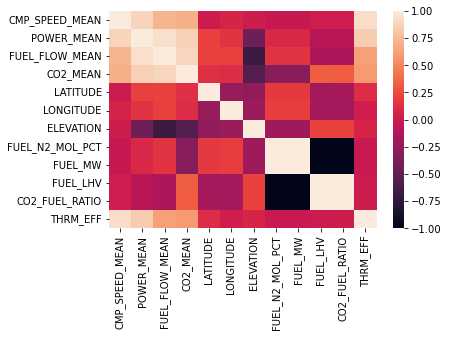

In [18]:
sns.heatmap(engine_final_num.corr())

When it comes to Thermal Efficiency, values that seem to correlate well with higher thermal efficency are the `CMP_SPEED_MEAN` (compressor speedin RPM), the `POWER_MEAN` (power output from the Low-Pressure Turbine (LPT) in kW). There are also values that do not correlate quite as well but do have some noticable correlation such as the `FUEL_FLOW_MEAN` (fuel flow into the combustor in kg/s) and the `CO2_MEAN` (carbon dioxide estimated emissions in kg/s). 

Lets make a scatterplot to visualize these correlations below

Text(0.5, 1.0, 'Thermal Efficiency vs CO2 Emissions')

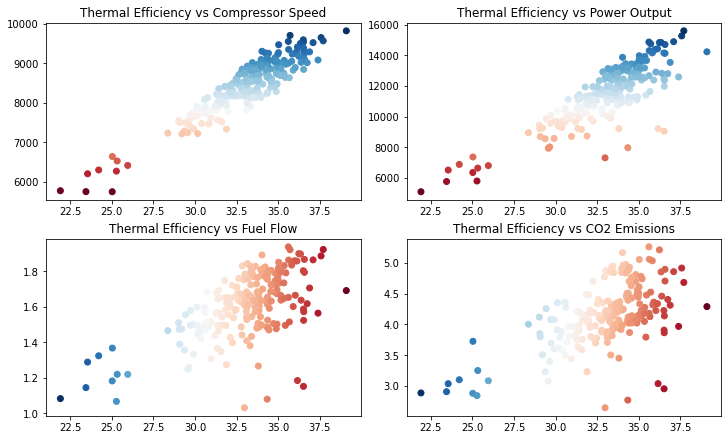

In [19]:
fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (10, 6))

ax[0,0].scatter(engine_final_num['THRM_EFF'], engine_final_num['CMP_SPEED_MEAN'], cmap = "RdBu_r", 
                c = engine_final_num['THRM_EFF'] - engine_final_num['CMP_SPEED_MEAN'])
ax[0,0].set_title("Thermal Efficiency vs Compressor Speed")

ax[0,1].scatter(engine_final_num['THRM_EFF'], engine_final_num['POWER_MEAN'], cmap = "RdBu_r", 
                c = engine_final_num['THRM_EFF'] - engine_final_num['POWER_MEAN'])
ax[0,1].set_title("Thermal Efficiency vs Power Output")

ax[1,0].scatter(engine_final_num['THRM_EFF'], engine_final_num['FUEL_FLOW_MEAN'], cmap = "RdBu_r", 
                c = engine_final_num['THRM_EFF'] - engine_final_num['FUEL_FLOW_MEAN'])
ax[1,0].set_title("Thermal Efficiency vs Fuel Flow")

ax[1,1].scatter(engine_final_num['THRM_EFF'], engine_final_num['CO2_MEAN'], cmap = "RdBu_r", 
                c = engine_final_num['THRM_EFF'] - engine_final_num['CO2_MEAN'])
ax[1,1].set_title("Thermal Efficiency vs CO2 Emissions")


We can conclude that higher compressor speed, power output, and fuel flow is associated with higher fuel efficiencies. It seems reasonable that power output and compressor speed lead to more thermal efficiency. It is a bit surprising to see a sizable correlation between fuel flow and thermal efficiency since the formula previously prevented shows that a lower fuel flow will result in less thermal efficiency. There is also a somewhat positive correlation between thermal efficiency and CO2 Emissions which shows that thermal efficiency may not necessarily lead to lower carbon emissions.

Another Noticable correlation is a negative correlation between `ELEVATION` and `CO2_MEAN`.

Text(0.5, 1.0, 'CO2_MEAN VS ELEVATION')

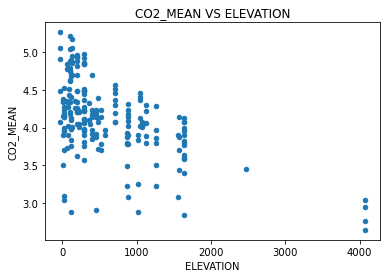

In [20]:
plotdata = engine_final_num.plot.scatter(x='ELEVATION', y='CO2_MEAN', )
plt.title('CO2_MEAN VS ELEVATION')

This could indicate that building gas turbines in lower elevation areas can possibly reduce CO2 emissions. 

# Plants that contain desirable attributes

Since we just determined that compressor speed and power output have a strong relationship with higher fuel efficiency. Lets see if we can identify specific gas turbine plants that stand out in these areas.

Text(0, 0.5, 'Compressor Speed (RPM)')

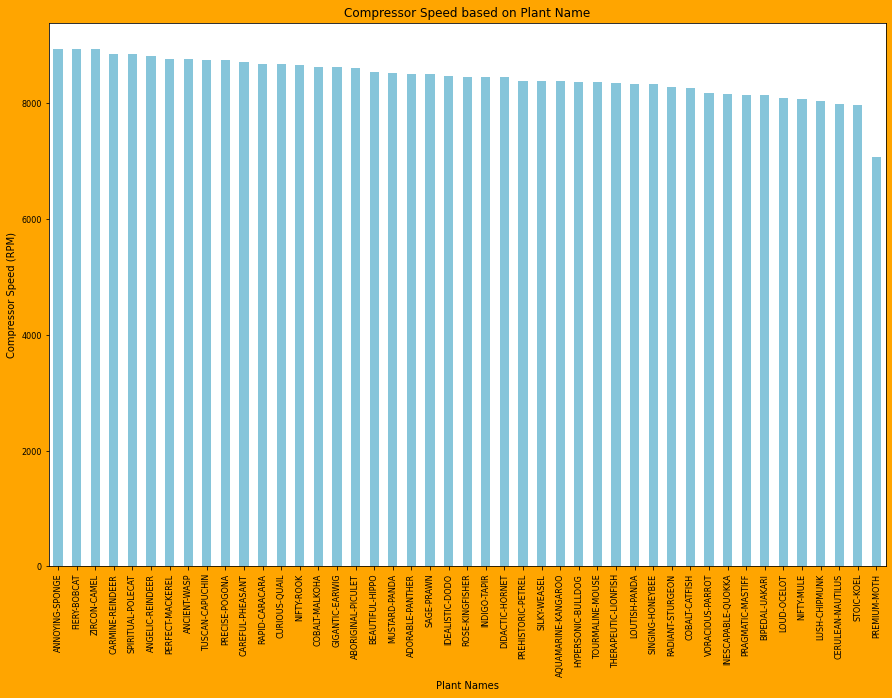

In [21]:
grouped_plant2 = engine_final.groupby('PLANT_NAME')
cmpspeed_plant = grouped_plant2['CMP_SPEED_MEAN']
cmpspeed_plant_mean = cmpspeed_plant.mean().round(decimals = 4).sort_values(ascending = False)

plotdata = cmpspeed_plant_mean

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=10)

plt.figure(facecolor='orange', figsize = (15,10))
plt.title("Compressor Speed based on Plant Name")

plotdata.plot(kind="bar", color = "#86C5DA")
plt.xlabel("Plant Names")
plt.ylabel("Compressor Speed (RPM)")

Annoying-Sponge has the highest compressor speed while Premium-Moth has the lowest compressor speed. Overall, most of these plants have around the same compressor speed. 

Text(0, 0.5, 'Power Output (kW)')

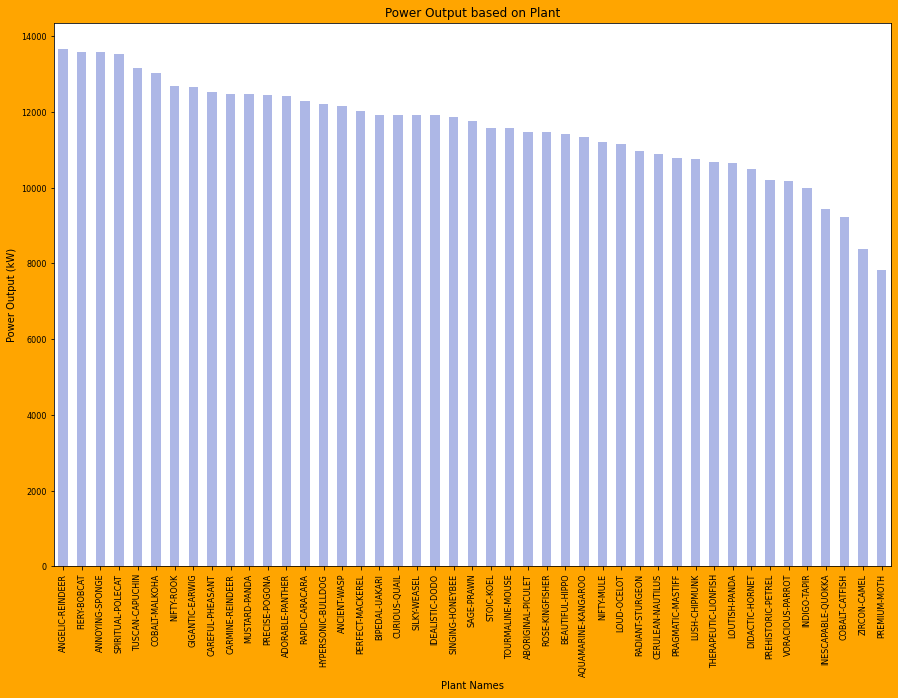

In [22]:
grouped_plant3 = engine_final.groupby('PLANT_NAME')
power_plant = grouped_plant3['POWER_MEAN']
power_plant_mean = power_plant.mean().round(decimals = 4).sort_values(ascending = False)

plotdata = power_plant_mean

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=10)

plt.figure(facecolor='orange', figsize = (15,10))
plt.title("Power Output based on Plant")

plotdata.plot(kind="bar", color = "#ADB7E6")
plt.xlabel("Plant Names")
plt.ylabel("Power Output (kW)")

Angelic-Reindeer has the highest power output from their Low-Pressure Turbine while Premium-Moth has the lowest power output. In terms of power it may be desirable to choose plants such as Angelic Reindeer, Rery Bobcat, and Annoying sponge. 

# 5. Conclusion

Our key findings through this project are:
- Compressor speed and power output are strongly related to higher fuel efficiencies
- Fuel efficiency has not necessarily lead to a reduction in CO2 emissions
- CO2 emissions tend to be lower in turbines located in lower elevation areas
- Most gas turbine plants in the data have similar wind turbine speeds
- The top 3 gas turbine plants in terms of power are Angelic Reindeer, Rery Bobcat, and Annoying Sponge
    

Currently it seems that gas turbine plants with high power and compressor speed are unable to generate energy at a way that reduces carbon emissions on the environment. A solution to this could be to adjust power plant locations so that they could be in higher elevation areas. 